# 11조 1렙부터 어디까지 데이터 분석제출파일입니다
<팀구성원> 
- 팀장 : 유별
- 팀원 : 김윤진, 임덕기 , 정윤재, 최효정

In [1]:
#기본 라이브러리 임포트 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.family'] ='AppleGothic'
#mpl.rcParams['font.family'] ='Malgun Gothic'

In [2]:
#멘처음 데이터 적재
df=pd.read_csv("실습데이터.csv")

## 시작단계


## 주제 선정 전 워크플로우 (1일차 접근방법)
- 1. 기초 통계량 및 그래프 그리기(전처리 필요성을 느낌)
- 2. 강의 구매횟수가 3회 이상 인사람들을 단골고객이라 생각하여 접근
- 3. 환불률에 따른 차이가 있는지 ex)월별로 환불이 더많이되는달의 유무
- 4. 쿠폰 분석 시도 

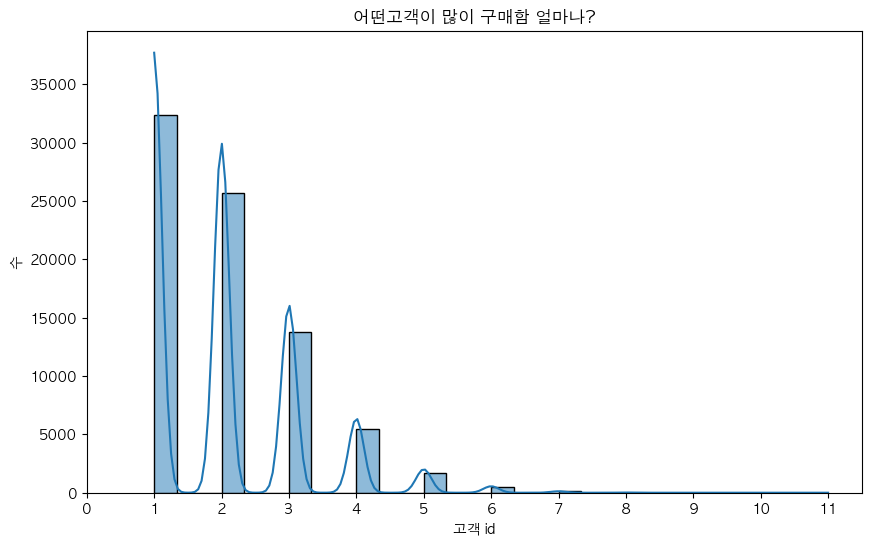

In [3]:
#1 강의 구매횟수가 3회 이상 인사람들을 단골고객이라 생각하여 접근
# "고객id"의 빈도를 계산합니다.
id_counts = df["고객id"].value_counts()

# 2번 이상 나타나는 "고객id"를 선택합니다.
dup_ids = id_counts[id_counts > 3].index

# 중복되는 "고객id"를 가진 행들만 선택합니다.
df_dup = df[df["고객id"].isin(dup_ids)]

# 결과를 출력합니다.
df_sorted=df_dup.sort_values(by="고객id")
df_sorted


#df_sorted.to_csv("user_idpt3.csv")
plt.figure(figsize=(10,6))
sns.histplot(id_counts,bins=30,kde=True)
plt.title("어떤고객이 많이 구매함 얼마나?")
plt.xlabel("고객 id")
plt.xticks(np.arange(0,max(id_counts)+1,1))
plt.ylabel("수")
plt.show()

# 3이상 산사람들이 생각보다 적다 또한 데이터를 살펴보니 다양한 카테고리 구매 이력을 발견하고 특징을 확인하지 못햇다.
# 성인강의는 필요에 의해 구매하는 사람이 많기때문에 많이 사지않는다 


In [4]:
#2 환불률에 따른 차이가 있는지 ex)강의별로 환불이 더많이되는달의 유무

# 'REFUND' 값이 있는 행만 추출하여 월별로 그룹화하고 개수를 계산
rfd_counts = df.loc[df['유형'] == 'REFUND'].groupby('코스(상품) 이름')['유형'].count().reset_index(name='refund_count')
# 강의별로 유형 행의 개수를 계산
all_counts = df.groupby('코스(상품) 이름')['유형'].count().reset_index(name='all_count')
# 강의별로 계산한 'rfd_count'와 'all_count'를 병합
rfd_lec_df = pd.merge(rfd_counts, all_counts, on='코스(상품) 이름')
# 'ratio'열에의 비율 값 계산하여 추가
rfd_lec_df['ratio'] = (rfd_lec_df['refund_count'] / rfd_lec_df['all_count']) * 100
# '코스 ID' 열 추가
rfd_lec_df = pd.merge(rfd_lec_df, df[['코스(상품) 이름', '코스ID']].drop_duplicates(), on='코스(상품) 이름')
# '카테고리' 열 추가
rfd_lec_df = pd.merge(rfd_lec_df, df[['코스(상품) 이름', '카테고리']].drop_duplicates(), on='코스(상품) 이름')
rfd_lec_df

,코스(상품) 이름,refund_count,all_count,ratio,코스ID,카테고리
0,UX Explorer : UXUI Design Conference 2022 VOD 판매,2,25,8.000000,209866,디자인
1,올인원 패키지 : 알고리즘 기술면접 완전 정복,22,369,5.962060,201435,프로그래밍
2,올인원 패키지 : 차근차근 따라하는 수익형 웹 사이트 만들기,21,343,6.122449,213919,프로그래밍
3,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,135,1822,7.409440,211087,프로그래밍
4,((2022 리부트)) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,62,750,8.266667,209686,프로그래밍
...,...,...,...,...,...,...
387,합격 패스 : 데이터베이스와 SQLD,32,686,4.664723,202698,프로그래밍
388,합격 패스 : 정보처리기사 필기&실기,1,1,100.000000,201518,프로그래밍
389,합격의 하이패스 : SQLD 자격 과정,30,573,5.235602,211543,프로그래밍
390,"해외주식명저로 배우는 글로벌 Top 헤지펀드, 퀀트 투자 전략",7,107,6.542056,208686,투자/재테크


In [5]:
# WELCOME 쿠폰 사용자
len(df[df['쿠폰이름'].str.contains('WELCOME')])
# 쿠폰의 총 사용 개수
count_obj = df['쿠폰이름'].dropna().astype(str).apply(lambda x: x.isalpha()).sum()
count_obj
# 위 코드에서 df['nan'].dropna()를 사용하여 NaN값을 제외한 '쿠폰이름' 컬럼의 시리즈를 추출하고,
# astype(str)을 사용하여 시리즈의 값을 문자열로 변환합니다. 그리고 apply(lambda x: x.isalpha())를 사용하여
# 각 문자열이 알파벳인지 아닌지를 판단하여 True/False 값을 반환하고, 마지막으로 sum()을 사용하여 True인 값의 개수를 구합니다.
# 이렇게 하면 NaN값을 제외하고 object 타입의 총 개수를 구할 수 있습니다.
# 쿠폰이 종류가 1200이상 존재해 분석이 어렵다렵다

33

## 주제선정전 얻은정보
- 고객에서의 단골로 예상되는 사람들은 생각보다 다양한 범위에 접근한다. 성인강의는 필요에 의해 구매하는 사람이 많기때문에 많이 사지 않는다. 신규 고객유입의 중요성을 느꼇다(1,2회 구매자가 많음)
- 환불은 어느카테고리나 별차이없이 환불률이 비슷했고 차이나는건 강의by강의의 영향이 높다
- 쿠폰종류가 방대하며 이름이 다달라서 분석하기 어려움이있다
- 기초통계량을 확인하여 강의수가 많이팔린 카테고리 등 기본정보를 습득하였고 전처리필요성을 느꼇다

# 주제 : 서브카테고리들이 패스트캠퍼스 성장에 도움이될까?
### 주제선정 개요
- 패스트캠퍼스 사이트를 들어갔더니 김영화 작가의 배너가 보였다.
- 패스트캠퍼스의 핵심은 코딩교육분야라고 생각했던 인식에 의문을 가졌다.
- 핵심종목인아닌 서브종목이 과연 매출에 도움이 될까.
- 왜 패스트캠퍼스는 서브 종목을 런칭했을까.
- 분석시작전 우리가 시작한 가설은 온라인 교육시장의 품목을 넓혀 점유율을 늘리고싶어 하는 것 같다.

## 사용할 데이터 전처리
- 1.데이터 분석의 편의성을 위해 금액의 데이터 타입의 -값을 0으로 치환후 해당값을 int형으로 변환했습니다.
- 2.거래일자 컬럼을 데이트 타임포맷으로 변환하여 월과 일의 컬럼을 추가하였습니다.
- 3. 검수용 데이터를 확인하여 제거하였습니다.(쿠폰이름이 검수,직원,강사등으로 확인되는 값)
    - 3-1) 검수용 쿠폰리스트에서 검수용이 아니라고 판단되는 목록을 제외했습니다.
- 4.무료강의, 더미데이터 값을 제거했습니다(ex)강의 이름: 테스트큐에이, 카테고리: 크리에이티브 등)
- 5 판매가격이 null값을 다른값으로 대체하였습니다. (거래금액 + 쿠폰할인액)
- 6 b2b판정방식을 2가지로 저희는 제한하였습니다.
    - 6-1)실거래금액이 판매가격보다 큰 경우 b2b로 판정하여 값을 제거하였습니다.
    - 6-2)거래시간이 초단위로 같은면서 강의 이름도 같은 거래가 3개이상일시로 판단.
    - 위 두조건을 합쳐서 새로운 b2b list를 만들어서 원래의 데이터에서 제거하였습니다.
- 7 2가지 선택지가 있습니다.
    - 7-1)PAYMENT REFUND를 모두 포함한 데이터를 all_df로 저장
    - 7-2)REFUND를 제외하고 PAYMENT만을 df로 저장
    - 저희는 용도에 맞게 REFUND제외한 데이터프레임을 분석에 사용하고 csv로 저장해 메인 데이터csv 사용했습니다.

In [6]:
## df 분석이 용이하게 바꾸기!!! (전처리)
# 거래id , 사이트 열 삭제
# df.drop('거래id', axis=1, inplace = True)
# df.drop('사이트', axis=1, inplace = True)
#데이터 타입 바꾸기 >> 금액을 모두 int형태로
df['거래금액'] = df['거래금액'].replace('-', '0').astype('int64')
df['판매가격'] = df['판매가격'].replace('-', np.nan).astype('float')
# df['판매가격'] = df['판매가격'].replace('-', '0').astype('int64')
df['쿠폰할인액'] = df['쿠폰할인액'].replace('-', '0').astype('int64')
df['환불금액'] = df['환불금액'].replace('-', '0').astype('int64')
# df['코스(상품) 이름'] = df['코스(상품) 이름'].astype('string')
# 거래일자 열의 형식을 '%Y. %m. %d. %p %I:%M:%S'로 변환 후 year, month, day 열 추가.
## 월 별로 차이점을 볼 수 있지 않을까 기대
## 오전 오후를 파이썬에서 어떻게 처리하는 방법을 몰라서 am, pm으로 바꿨음.
df['거래일자'] = df['거래일자'].str.replace('오전', 'AM').str.replace('오후', 'PM')
df['거래일자'] = pd.to_datetime(df['거래일자'], format='%Y. %m. %d. %p %I:%M:%S').dt.strftime('%y. %m. %d. %H:%M:%S')
df['거래일자'] = pd.to_datetime(df['거래일자'], format='%y. %m. %d. %H:%M:%S')
# df['year'] = df['거래일자'].dt.year
df['월'] = df['거래일자'].dt.month
df['일'] = df['거래일자'].dt.day
# df['ampm'] = df['거래일자'].dt.strftime('%p')
# df['hour'] = df['거래일자'].dt.hour
# df['minute'] = df['거래일자'].dt.minute
# df['second'] = df['거래일자'].dt.second

## 쿠폰등을 통해 확인한 b2b 데이터 제거 작업
coupon_df = df.groupby('쿠폰이름')['쿠폰이름'].value_counts().sort_values(ascending=False).to_frame()
coupond_df = coupon_df.reset_index(inplace=True)
coupon_df
checking_coupon_df = coupon_df[coupon_df['쿠폰이름'].str.contains('내부|직원|검수|강사|참고|조교|PD')].reset_index()
del checking_coupon_df['index']
# 직원이 검수하는 등으로 쓴 내부자용 쿠폰이 아닌경우 -
except_list = ['[20%할인쿠폰] 허들러스 유성민 강사 컨설팅 등록자 전용 할인 쿠폰', '아일리스 임직원 전용 50% 쿠폰', '[권오상의 금융 아카데미 5탄] 내부회계관리제도 3만원 할인 쿠폰!', '[권오상의 금융 아카데미 5탄] 내부회계관리제도 3만원 할인 쿠폰!', '[권오상의 금융 아카데미 5탄] 내부회계관리제도 5만원 할인 쿠폰!', '[권오상의 금융 아카데미 5탄] 내부회계관리제도 8만원 할인 쿠폰!',
               '[권오상의 금융 아카데미 5탄] 내부회계관리제도 10만원 할인 쿠폰!', '[30% 할인 수강권] 강사님 지인 제공용', '[20% 할인쿠폰] 김은호 강사님 채널 전용 20% 할인 쿠폰', '[20%할인쿠폰] 허들러스 유성민 강사 컨설팅 등록자 전용 할인 쿠폰', '[20% 할인쿠폰] The RED : 강사룡의 앱 안정성 및 확장성 강화를 위한 Android 아키텍처 할인쿠폰',
               '[20% 할인쿠폰] Kubernetes 자격증 마스터 클래스 : CKA/CKAD/CKS 강사님 할인 쿠폰', '[30% 할인쿠폰] 강사님 지인 할인 쿠폰_Kotlin&Spring', '사이드프로젝트 (오아리 강사님) 50% 할인쿠폰', '[20% 할인쿠폰] The RED : 강사룡의 앱 안정성 및 확장성 강화를 위한 Android 아키텍처', '[할인쿠폰] 강사님 지인 20% 할인 쿠폰',
               '[30% 할인쿠폰] 김정식 강사님 채널 전용 30% 할인 쿠폰', '[50% 수강 할인권] 강사님 제공용', '[50% 할인 수강권] 강사님 지인 제공용', '신해동 강사 쿠폰 제공_2209', '신해동 강사 쿠폰 제공', '신해동 강사 쿠폰 제공_2211', '초격차 패키지 : 퍼포먼스 마케팅, 데이터로 완전정복_강사 제공 쿠폰', '[무료수강권] 허들러스 유성민 강사 컨설팅 등록자 증정 쿠폰', '[50% 할인 쿠폰] 강의 참고용 발행_조교님']
#  - 제외 시킨다
for i in except_list:
    cheking_coupon_df = checking_coupon_df.drop(checking_coupon_df[checking_coupon_df['쿠폰이름'] == i].index, inplace=True)
checking_coupon_df.reset_index(inplace=True)
#왜인지 모르겠지만 지워지지않은 '아일리스 임직원 전용 50% 쿠폰'을 내부,검수용 리스트에서 직접 삭제
checking_coupon_df.drop(38,inplace=True)
checking_coupon_df
name_list = checking_coupon_df['쿠폰이름'].tolist()
## 위에서 정의한 '내부, 검수용'으로 판명되는 row를 삭제
for i in name_list:
    df.drop(df[df['쿠폰이름'] == i].index, inplace=True)
# 무료 강의 지우는 코드
df = df.drop(df[df['코스(상품) 이름'].str.contains('무료')].index)
df = df.drop(df[df['코스(상품) 이름'] == 'test_qa'].index)
## 크리에이티브 카테고리: 1 >> 더미 데이터, 삭제 필요
df = df.drop(df[df['카테고리'] == '크리에이티브'].index)
PAY_df = df[df['유형'] == 'PAYMENT']
PAY_df
PAY_df[PAY_df['판매가격'] =='-']
# 기존 판매가격 값이 NaN인 경우에만 새로운 값으로 대체: 거래금액 + 쿠폰할인액
df['판매가격'] = df['판매가격'].fillna(df.apply(lambda x: x['쿠폰할인액'] + x['거래금액'] if pd.isna(x['판매가격']) else x['판매가격'], axis=1))
df['판매가격'] = df['판매가격'].astype('int')
# df.info()
# 실거래금액이 판매가격보다 큰 경우 b2b로 판정
b2b_df = df[df['실거래금액'] > df['판매가격']]
b2b_df.to_csv('제목 바꾸기.csv')

# 거래일자(거래시간이 초단위까지 같음)가 3개이상인 데이터의 경우 기업 단체구매로 판정, b2b로 분류
## WHY 3개 이상?: 패스트캠퍼스 b2b홈페이지에서 강의목록을 봤더니 2개 같이 팔렸는데 목록에 없는 강의가 있음.
hmm_df = PAY_df.groupby('거래일자')['코스(상품) 이름'].value_counts().to_frame().reset_index()
hmm_re_df = hmm_df[hmm_df['count'] >= 3]
hmm_re_df.reset_index()
# PAY_df와 hmm_re_df에 일치하는 데이터만 남기는 코드 , 원래 hmm_re_df에는 컬럼이 별로 없어서 병합해서 컬럼을 추가해야함
merged_df = pd.merge(PAY_df, hmm_re_df[['거래일자', '코스(상품) 이름']], on=['거래일자', '코스(상품) 이름'])
merged_df['판매가격'] = merged_df['판매가격'].replace('-', np.nan)
# 기존 판매가격 값이 NaN인 경우에만 새로운 값으로 대체: 거래금액 + 쿠폰할인액을 판매가격으로
merged_df['판매가격'] = merged_df['판매가격'].fillna(merged_df.apply(lambda x: x['쿠폰할인액'] + x['거래금액'] if pd.isna(x['판매가격']) else x['판매가격'], axis=1))
merged_df['판매가격'] = merged_df['판매가격'].astype('int')
merged_df.info()

## merge b2b로 판정된(거래시간이 초단위로 같은것  & 실거래금액이 판매가격보다 큰 것)행을  df로 병합
re_merged_df = pd.merge(merged_df, b2b_df, how='outer', on=list(merged_df.columns), suffixes=('_merged_df', '_b2b_df'))
# len(re_merged_df)
# re_merged_df.to_csv('b2b데이터 maybe 최종본 : 1489개.csv')


#PAYMENT REFUND를 모두 포함한 데이터를 all_df로 저장
b2b_list = re_merged_df['거래id'].tolist()
for i in b2b_list:
    ALL_df = df.drop(df[df['거래id'] == i].index)
# df.to_csv('b2c : REFUND 포함 전체 데이터.csv')

#REFUND를 제외하고 PAYMENT만을 df로 저장
b2b_list = re_merged_df['거래id'].tolist()
for i in b2b_list:
    df = PAY_df.drop(PAY_df[PAY_df['거래id'] == i].index)
#PAY_df.to_csv('전처리저장용.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   거래id       366 non-null    int64         
 1   유형         366 non-null    object        
 2   고객id       366 non-null    int64         
 3   코스ID       366 non-null    int64         
 4   사이트        366 non-null    object        
 5   포맷         366 non-null    object        
 6   카테고리       366 non-null    object        
 7   코스(상품) 이름  366 non-null    object        
 8   거래일자       366 non-null    datetime64[ns]
 9   쿠폰이름       366 non-null    object        
 10  판매가격       366 non-null    int64         
 11  결제수단       366 non-null    object        
 12  실거래금액      366 non-null    int64         
 13  쿠폰할인액      366 non-null    int64         
 14  거래금액       366 non-null    int64         
 15  환불금액       366 non-null    int64         
 16  월          366 non-null    int32         
 1

### 형태소 분석
- 한국어 영어를 두번 분석한이유 : okt적용실패로 한국어와 영어 한개의 종류만 분석가능
- 1.한국어는 mecab사용 불용어를 제거하고 기술스택기준으로 전체단어키워드.csv파일저장
- 2.영어는 nitk를 사용 불용어를 제거하고 한국어랑 동일한 기준으로 탑 100을 csv파일 저장
- 3.위 두 탑 100csv파일을 불러와서 합쳐 영어와 한국어 빈도수를 정렬시킨 후 워트아트에 출력해 시각화

In [7]:
import numpy as np
from pecab import PeCab
# 워드클라우드 관련
from wordcloud import WordCloud
from PIL import Image
# 자연어처리 관련
import nltk
# 파일 처리 관련
import pandas as pd
import os
import re

In [8]:
# mecab기준 명사 형용사 부사

FEATURE_POS = ['NNG', 'NNP', 'NNB', 'NNBC', 'NR',
               'NP', 'VV', 'VA', 'MAG']

def text_cleaning(doc):
    # 한국어를 제외한 글자를 제거하는 패턴.
   # doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    
    # 특수문자를 제거하는 패턴.
    doc = re.sub("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<ㅁ>@\#$%&\\\=\(\'\"]", " ", doc)
    
    # 영문 빼고 모두 제거하는 패턴.
    #doc = doc.replace("\n", " ")
    #doc = re.sub("[^A-Za-z ]", "", doc)
    
    return doc

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    SW.add("있어요")
    SW.add("대한")
    SW.add("합니다")
    SW.add("하는")
    SW.add("패키지")
    SW.add("격차")
    SW.add("올인원")
    SW.add("끝내")
    SW.add("개발")
    SW.add("배우")
    SW.add("만드")
    SW.add("완전")
    SW.add("정복")
    SW.add("완성")
    SW.add("필수")
    SW.add("마스터")
    SW.add("아카데미")
    SW.add("캐주얼")
    SW.add("프로젝트")
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path, encoding="utf-8") as f:
        for word in f:
            SW.add(word.strip())
            
    return SW
tok = PeCab()  # Mecab 객체를 전역 변수로 선언

def text_tokenizing(doc, tokenizer):
    """
    Input Parameter :
    
    doc - tokenizing 하는 실제 데이터. (문서단위)뉴스본문 하나,  
    tokenizer - token의 단위.
    """
    
    if tokenizer == "words":
        return [word for word in doc.split() if word not in SW and len(word) > 1]
    
    elif tokenizer == "nouns":
        return [token for token in tok.nouns(doc) if len(token)>3]
        
    elif tokenizer == "morphs":
        return [token for token in tok.morphs(doc)]
        
    elif tokenizer == "predefined":
        
        documents = []
        text_pos = [pair for pair in tok.pos(doc) if pair[0] not in SW and len(pair[0]) > 1]
        words = []

        for word, pos in text_pos:
            if pos in FEATURE_POS:
                words.append(word)

        return words


In [9]:
#한국어 분석 

from collections import Counter

# df_ca가 바로 분석하고자 하는 텍스트 데이터라고 이해하고 진행합니다.
texts = df["코스(상품) 이름"]

# 텍스트 클리닝, 불용어 정의, 토큰화 진행
cleaned_texts = [text_cleaning(text) for text in texts]
SW = define_stopwords('data/stopwords-ko.txt') 
tokenized_texts = [text_tokenizing(text, 'predefined') for text in cleaned_texts]

# 모든 단어들을 하나의 리스트로 합치기
all_words = [word for text in tokenized_texts for word in text]

# 단어 빈도 계산
word_count = Counter(all_words)

# 가장 많이 사용된 단어 30개 출력전체단어
all_words=(word_count.most_common(30))

df_all_words=pd.DataFrame(all_words,columns=["제목","값"])
df_all_words.to_csv("전체단어 키워드.csv",index=False)


# 영어 추가할 불용어 리스트
x_words = ['RED', 'specific_word2', 'specific_word3']

In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords


# 영어 텍스트 추출
english_text = df['코스(상품) 이름'].str.extractall(r'([A-Za-z]+)').reset_index()[0]


# 불용어 제거
stop_words = set(stopwords.words('english'))
# 추가할 불용어 리스트
custom_stop_words = ['RED', 'specific_word2', 'specific_word3']
stop_words.update(custom_stop_words)
english_words = [word for word in english_text if word.lower() not in stop_words and word != 'RED']


# 단어 빈도수 계산
freq = nltk.FreqDist(english_words)
freq_df = pd.DataFrame(freq.most_common(20), columns=['제목', '값'])
# csv 파일로 저장
freq_df.to_csv('영어top100키워드.csv', index=False, encoding='utf-8-sig')


In [11]:


# 두 개의 csv 파일 불러오기
df_hg = pd.read_csv("전체단어 키워드.csv")
df_eg = pd.read_csv('영어top100키워드.csv')

# 두 개의 데이터프레임 합치기
df_merge = pd.concat([df_hg, df_eg], ignore_index=True)
df_merge = df_merge.sort_values('값', ascending=False)

df_merge.to_csv("0516빈도수.csv")

### 강의코스의 빈도수를 워트아트로 나타내어 확인
- 생각보다 프로그래밍과 데이터사이언스가 아닌 다른 엑셀, 일러스트, 디자인 등 다른 단어들도 빈도가 높았다.

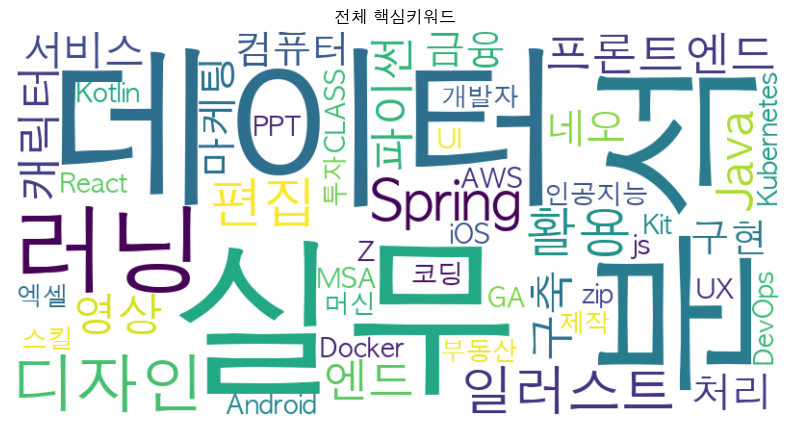

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 데이터 불러오기
df_hong = pd.read_csv('0516빈도수.csv', encoding='utf-8')

# 제목과 수 컬럼을 이용해 워드클라우드에 사용할 텍스트 데이터 생성
text_data = ' '.join(df_hong['제목'])

# 한글 폰트 설정
font_path = "/Library/Fonts/AppleGothic.ttf"

# 워드클라우드 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text_data)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('전체 핵심키워드')
plt.show()


In [13]:
#1.연간 판매 수의 top30봤을때 프로그래밍 데이터 사이언스도 많지만 생각보다 다른 카테고리의 상품도 상위권에 있었다

In [14]:
## new_df 정의

# df=pd.read_csv("전처리저장용.csv")
# df['거래일자'] = pd.to_datetime(df['거래일자'], format = '%Y-%m-%d %H:%M:%S')
## 분석의 편의성을 위해서 코스(상품) 이름으로 groupby한 dataframe을 만들겠습니다.
## new_df 및 새로운 column 생성,
# 코스를 행으로 카테고리, 코스id, 포맷을 열로
new_df = df.groupby('코스(상품) 이름')[['카테고리','코스ID', '포맷']].max()
# 가격을 열로 추가. 가격 == 판매가격 중 가장 높은 값
new_df['가격'] = df.groupby('코스(상품) 이름')['판매가격'].max().astype(int)
# 판매건수 열로 추가
new_df['판매건수'] = df['코스(상품) 이름'].value_counts()
# 총매출 추가: 실거래금액의 총합
new_df['총매출'] = df.groupby('코스(상품) 이름')['실거래금액'].sum()
# 코스 당 총매출을 판매건수로 나누어 건당평균가격을 구함.
new_df['건당평균가격'] = (new_df['총매출'] / new_df['판매건수']).round(2)
# 평균할인액을 최대 가격에서 강의별 거래가격의 평균으로 정의하고 열에 추가.
new_df['평균할인액'] = (new_df['가격'] - new_df['건당평균가격'])
new_df['평균할인율'] = ((new_df['가격'] - new_df['건당평균가격']) / new_df['가격'] *100).round(2)
# '유형' == REFUND로 환불 횟수 설정, 열에 비율 및 횟수 추가 >>> PAYMENT만 있는 data를 사용하기로 하면서 쓸모 없어짐.
# rfd_counts = df[df['유형'] == 'REFUND'].groupby('코스(상품) 이름')['유형'].count()
# new_df['환불건수'] = rfd_counts
# new_df['환불률'] = (new_df['환불건수'] / new_df['판매건수'] * 100).round(2)
# '쿠폰이름' != 0 으로 쿠폰 사용 개수를 정의, 열에 개수 및 사용률 추가
coupon_counts = df[df['쿠폰이름'] != '-'].groupby('코스(상품) 이름')['쿠폰이름'].count()
new_df['쿠폰사용개수'] = coupon_counts
new_df['쿠폰사용률'] = ((coupon_counts / df.groupby('코스(상품) 이름')['쿠폰이름'].count())*100).round(2)
#  '코스 별로 거래일자의 최초값 (min)을 기준으로 코스 시작일을 설정 판매기간(일) 및 일간판매량 열에 추가
# '판매기간(일)'의 max값은 365입니다.
new_df['코스시작일'] = df.groupby('코스(상품) 이름')['거래일자'].min().dt.strftime('%Y-%m-%d')
new_df['판매기간(일)'] = (pd.to_datetime('2023-01-01') - pd.to_datetime(new_df['코스시작일'])).dt.days
new_df['일간판매량'] = (new_df['판매건수'] / new_df['판매기간(일)']).round(2)
## 제일 많이 팔린 순으로 정렬한 뒤 index를 붙였습니다.
new_df = new_df.sort_values('판매건수', ascending = False)
new_df.reset_index(inplace=True)
# 의도대로 만들어졌는지 확인.
new_df.head(30).to_csv("top30.csv")
new_df.head(30)

,코스(상품) 이름,카테고리,코스ID,포맷,가격,판매건수,총매출,건당평균가격,평균할인액,평균할인율,쿠폰사용개수,쿠폰사용률,코스시작일,판매기간(일),일간판매량
0,초격차 패키지 : 일잘러 필수 스킬 모음.zip,업무 생산성,204373,올인원,168000,2691,330366105,122767.04,45232.96,26.92,1493.0,55.48,2022-01-01,365,7.37
1,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),프로그래밍,211368,올인원,203000,2500,362815200,145126.08,57873.92,28.51,1457.0,58.28,2022-05-30,216,11.57
2,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,203720,올인원,317100,2465,433555600,175884.62,141215.38,44.53,1344.0,54.52,2022-01-01,365,6.75
3,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,203525,올인원,325500,2097,389668500,185821.89,139678.11,42.91,1157.0,55.17,2022-01-01,365,5.75
4,올인원 패키지 : 세계 3등에게 배우는 실무 밀착 데이터 시각화,데이터 사이언스,206356,올인원,190000,1819,246654450,135598.93,54401.07,28.63,973.0,53.49,2022-01-01,365,4.98
5,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,프로그래밍,211087,올인원,185000,1677,244770800,145957.54,39042.46,21.10,895.0,53.37,2022-05-30,216,7.76
6,올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,프로그래밍,207343,올인원,360500,1626,399489400,245688.44,114811.56,31.85,974.0,59.90,2022-01-01,365,4.45
7,초격차 패키지: Kubernetes와 Docker로 한 번에 끝내는 컨테이너 기반 MSA,프로그래밍,208963,올인원,402270,1613,392779760,243508.84,158761.16,39.47,911.0,56.48,2022-01-01,365,4.42
8,초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영,프로그래밍,206717,올인원,318500,1576,251397500,159516.18,158983.82,49.92,808.0,51.27,2022-01-01,365,4.32
9,초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화,프로그래밍,206060,올인원,234000,1471,252482100,171639.77,62360.23,26.65,798.0,54.25,2022-01-01,365,4.03


#### 서브카테고리와 메인카테고리 지정
     - 카테고리 전체의 매출량과 카테고리의 강의비율을 확인하고 데이터사이언스와 프로그래밍의 비중이 가장 높다는걸 확인해 메인카테고리로 지정하였습니다
     - 기존 페스트 켐퍼스는 코딩교육을 주로한다는 인식이 있어 메인컨텐츠를 선정하는대 영향

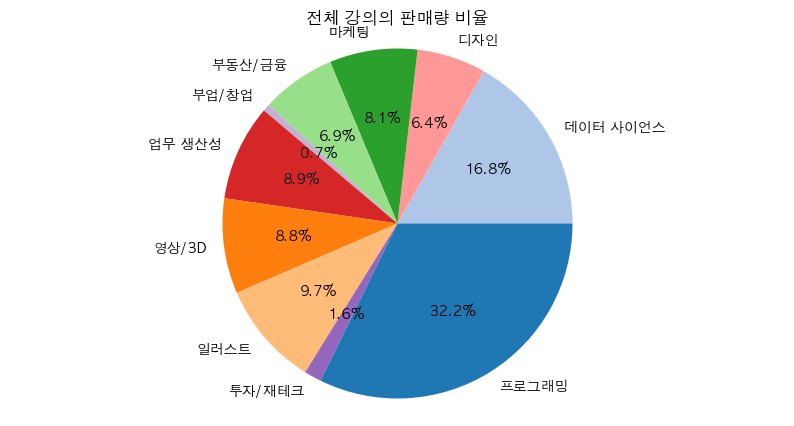

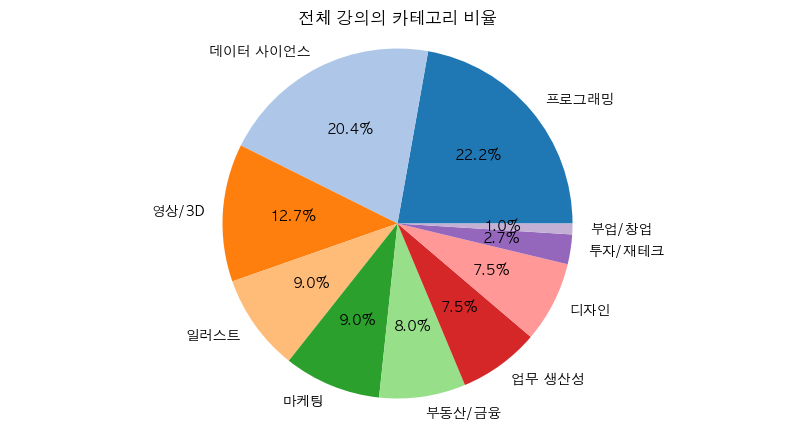

In [15]:
# 카테고리별 판매량 데이터
sell_counts = new_df.groupby('카테고리')['판매건수'].sum()
# 카테고리별 카운트 데이터
category_counts = new_df['카테고리'].value_counts()
# 색상 리스트 생성
colors = plt.cm.tab20(range(len(category_counts)))
# 카테고리명과 색상을 매핑
category_colors = dict(zip(category_counts.index, colors))
plt.figure(figsize=(10, 5))
# 첫 번째 파이 그래프
sell_labels = sell_counts.index.tolist()
sell_colors = [category_colors[category] for category in sell_labels]
plt.pie(sell_counts, labels=sell_labels, autopct='%1.1f%%', colors=sell_colors)
plt.title('전체 강의의 판매량 비율')
plt.axis('equal')
# 두 번째 파이 그래프
category_labels = category_counts.index.tolist()
category_colors = [category_colors[category] for category in category_labels]
plt.figure(figsize=(10, 5))
plt.pie(category_counts, labels=category_labels, autopct='%1.1f%%', colors=category_colors)
plt.title('전체 강의의 카테고리 비율')
plt.axis('equal')
# 그래프 표시
plt.show()

- 서브 카테고리에 대한 수요가 상당히 무시하지 못할 수치인 것을 확인
  - 서브카테고리가 시간에 흐름에 따라 늘어나고있는지를 그래프로 그려서 확인
  - 2023 패스트캠퍼스 홈페이지에 접속하여 현재 2023년 5월을 기준으로 얼마나 서브 카테고리가 늘어났는지 확인

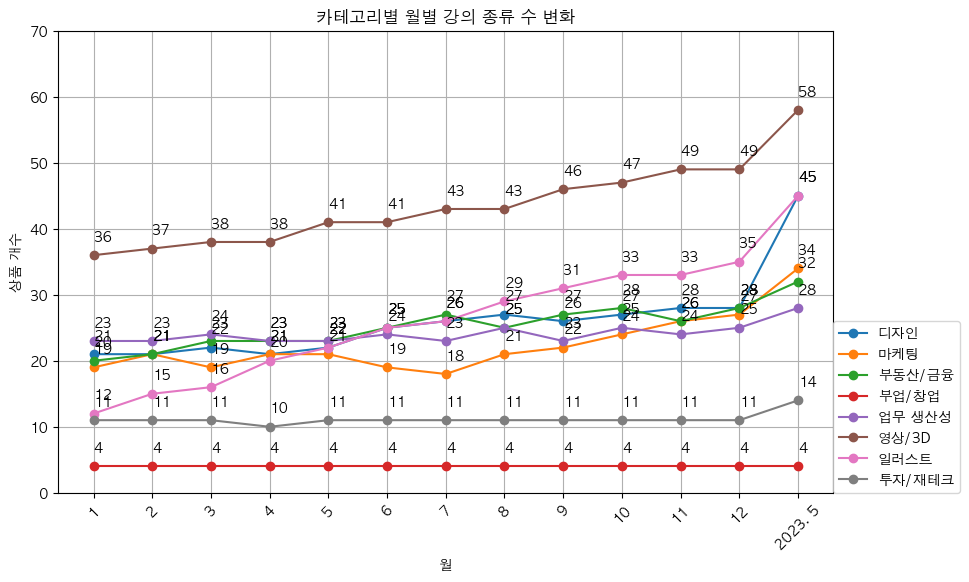

In [16]:
df=pd.read_csv("전처리저장용.csv")
## 카테고리 별 월 별 강의종류 개수, 판매량, 실거래금액 등을 보고 싶어서 만든 df2
result1 = df.groupby(df['카테고리'])['월'].value_counts() ## 카테고리 별 월 별 개수
result2 = df.groupby(['카테고리', '월'])['코스(상품) 이름'].nunique() ## 카테고리 별 월 별 상품 개수
result3 = df.groupby(['카테고리', '월'])['거래금액'].sum() ## 카테고리 별 월 별 실거래금액의 합
result4 = (result3 / result2).round() ## 거래금액의 강의 종류당
result5 = (result1 / result2).round()
df2 = pd.DataFrame()
df2['판매건수'] = result1
df2['상품 개수'] = result2
df2['총거래금액'] = result3
df2['강의 당 평균 월매출'] = result4
df2['강의당 평균 판매량'] = result5
# df.reset_index()
df2 = df2.sort_index().reset_index()
# 카테고리별 월별 강의 종류 수 변화를 그래프로 그리는 코드
## 그래프를 그릴 때, 홈페이지에서 국비지원을 제외한 런칭 강의 수를 확인하여 2023. 5월 강의 종류수를 합친 csv파일을 만들어서 그래프를 그렸습니다
df2.to_csv('forgraph.csv', encoding = 'utf-8-sig')
## forgraph csv에서 직접 값을 추가 후 forgraph2로 저장.
df2 = pd.read_csv('./forgraph2.csv').reset_index(drop=True)
df2.drop('Unnamed: 0', axis = 1, inplace = True)
fig, ax = plt.subplots(figsize=(10, 6))
categories = df2['카테고리'].unique()
for category in categories:
    if category not in ['프로그래밍', '데이터 사이언스']:  # 메인으로 분류한 프로그래밍과 데이터 사이언스 제외
        category_data = df2[df2['카테고리'] == category]
        ax.plot(category_data['월'], category_data['상품 개수'], marker='o', label=category)
        for i, j in zip(category_data['월'], category_data['상품 개수']):
            ax.annotate(str(j), xy=(i, j), xytext=(0, 10), textcoords='offset points')
ax.set_xlabel('월')
ax.set_ylabel('상품 개수')
ax.set_title('카테고리별 월별 강의 종류 수 변화')
ax.legend(loc=(1,0))
plt.ylim(0,70)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 패스트 캠퍼스가 서브 카테고리의 수를 늘리는이유 
 https://www.hankyung.com/it/article/2022052467241
 - 위 기사는 패스트 캠퍼스 대표가 말씀하시는 패스트 캠퍼스 방향입니다.
 1) 콘텐츠 최신성
 2) 강사의 직무 전문성
 3) 시장 잠재성
 
 - 2023년 일본 뉴스기사 - 버튜버 산업의 가능성과 한층 빨리 런칭한 네오아카데미
https://www.korit.jp/news_mirakleletter_vtuber

# 1.일러스트계의 초신성 등장 ! 네오아카데미
- 확실히 메인 카테고리가 많은 판매수를 차지하고 있습니다 
- 데이터를 보면 월별 메출과 판매량을 그래프로 표현하고 있습니다. 이 때, 눈에 뛰는 곳이 딱 한 곳 있습니다.
   - 바로 8월과 9월인데, 네오아카데미의 등장으로 일시적으로나마 데이터 사이언스의 과목을 이기는 것을 보여주고 있습니다.

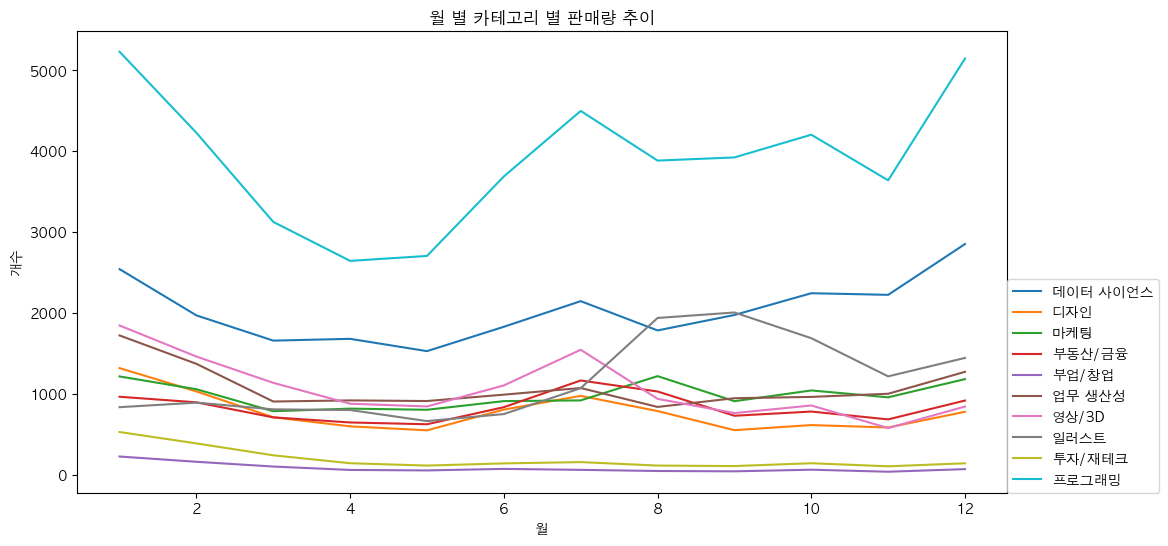

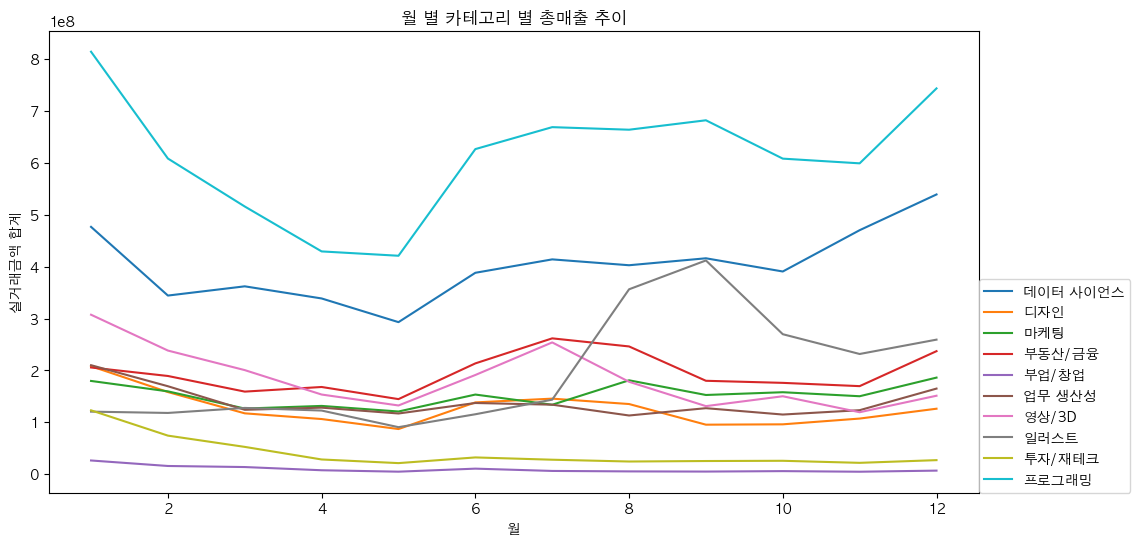

In [17]:
grouped_df = df.groupby(['월', '카테고리'])['코스(상품) 이름'].count().reset_index()
pivoted_df = grouped_df.pivot_table(index='월', columns='카테고리', values='코스(상품) 이름').fillna(0)
fig, ax = plt.subplots(figsize=(12, 6))
for col in pivoted_df.columns:
    ax.plot(pivoted_df.index, pivoted_df[col], label=col)
ax.set_xlabel('월')
ax.set_ylabel('개수')
ax.set_title('월 별 카테고리 별 판매량 추이')
ax.legend(loc =(1,0) )
plt.show()

grouped_df = df.groupby(['월', '카테고리'])['실거래금액'].sum().reset_index()
pivoted_df = grouped_df.pivot_table(index='월', columns='카테고리', values='실거래금액').fillna(0)
fig, ax = plt.subplots(figsize=(12, 6))
for col in pivoted_df.columns:
    ax.plot(pivoted_df.index, pivoted_df[col], label=col)
ax.set_xlabel('월')
ax.set_ylabel('실거래금액 합계')
ax.set_title('월 별 카테고리 별 총매출 추이')
ax.legend(loc=(1,0) )
plt.show()

### # 일간 판매량으로 봤을때 네오아카데미는 어떨까?
- 일간판매량기준:  
1. 처음 판매된 거래 일시를 기준으로 예상런칭일을 기준으로 런칭기간을 구했습니다.
2. 총 거래의 금액을 런칭기간으로 나누어 일간판매량을 구했습니다. 
 
- 결과: 일러스트의 일간판매량을 계산했을때 제일 높은 수치를 있음을 보여주고 있습니다.

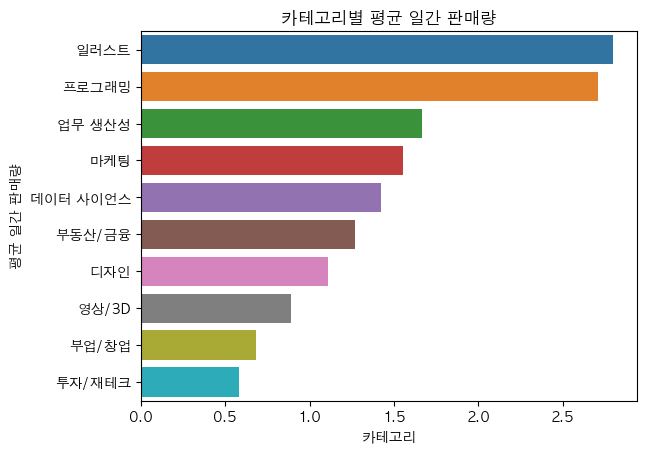

In [18]:

to_bar = new_df.groupby('카테고리')['일간판매량'].mean().sort_values(ascending=False)
sns.barplot(x=to_bar.values, y=to_bar.index)
plt.xlabel('카테고리')
plt.ylabel('평균 일간 판매량')
plt.title('카테고리별 평균 일간 판매량')
plt.show()

 ### 네오아카데이의 일러스트 카테고리 점유율
 -8월 부터 등장한 네오아카데미가 일러스트의 매월 전체 판매량에 36~61정도의 비중을 차지하면서 일러스트에서의 높은 점유율을 차지해 판매량을 견인하고 있습니다

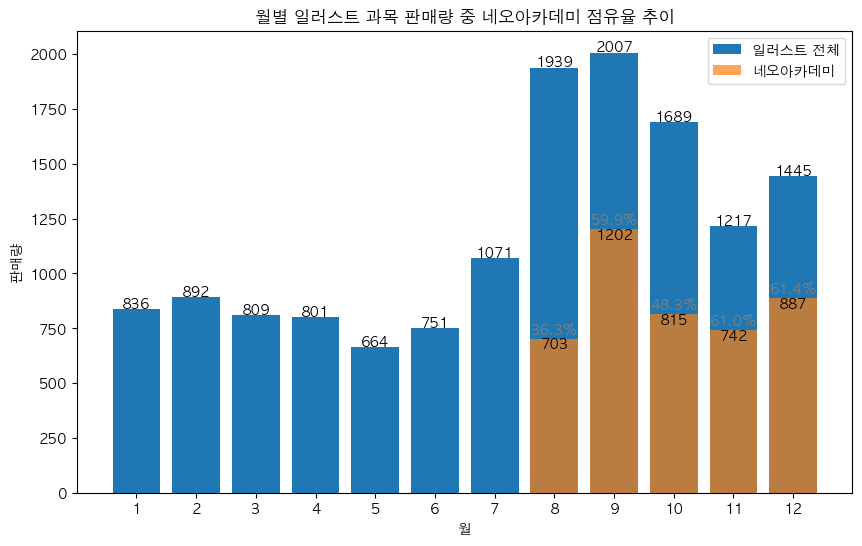

In [19]:
### 월 별 일러스트의 판매량 추이 및 네오아카데미 판매량 추이
# 데이터프레임에서 필요한 칼럼만 추출하여 작업
illust = df[df['카테고리'] == '일러스트']
illust_sum = illust.groupby('월')['거래id'].count()
neo_of_illust = illust[illust['코스(상품) 이름'].str.contains('네오')]
neo_sum = neo_of_illust.groupby('월')['거래id'].count()
# 전체 판매량 대비 네오아카데미의 점유율 계산
neo_percentage = neo_sum / illust_sum * 100
# 그래프 설정
plt.figure(figsize=(10, 6))
# 기존 막대 그래프 생성
plt.bar(range(1, 13), illust_sum, label='일러스트 전체')
# 데이터 레이블 생성
for i, value in enumerate(illust_sum):
    plt.text(i + 1, value + 5, str(value), ha='center')
# 네오아카데미 막대 그래프 생성
if len(neo_sum) > 0:
    neo_start_month = neo_sum.index[0]
    plt.bar(range(neo_start_month, 13), neo_sum, label='네오아카데미', alpha=0.7)
    # 데이터 레이블 표시
    for i, value in enumerate(neo_sum):
        plt.text(i + neo_start_month, value + 5, f'{neo_percentage[i+neo_start_month]:.1f}%', ha='center', va='bottom', color='gray')
        plt.text(i + neo_start_month, value + 5, str(value), ha='center', va='top')
# 축과 제목 설정
plt.xticks(range(1, 13))
plt.xlabel('월')
plt.ylabel('판매량')
plt.title('월별 일러스트 과목 판매량 중 네오아카데미 점유율 추이')
# 범례 추가
plt.legend()
# 그래프 출력
plt.show()

# 2.더레드 프리리엄 콘텐츠로 살펴본 직무 전문성 반영의 중요성


In [20]:
import pandas as pd
df=pd.read_csv("전처리저장용.csv")
import matplotlib as mpl
mpl.rcParams['font.family'] ='AppleGothic'
df_ca=df[df["카테고리"]=="마케팅"]

In [21]:
# 월별로 '코스(상품) 이름'의 빈도수 계산하여 파일로 저장
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # '코스(상품) 이름'의 빈도수 계산
    course_counts = df_month['코스(상품) 이름'].value_counts()
    
    # 데이터프레임으로 변환
    df_course_counts = pd.DataFrame({'코스(상품) 이름': course_counts.index, '빈도수': course_counts.values})
    
    # 월별 파일로 저장
    file_name = f'./noRED/월별_코스별_빈도수_{month}월.csv'
    df_course_counts.to_csv(file_name, index=False)


#### 생각보다 높은 비중을 차지하고 있는 김영하의 강좌
- 아래 그래프를 보시면 월마다 전체 마케팅 강의에서 김영하라는 작가의 강좌가 얼마나 많은 비중으로 팔렸는지 알 수 있습니다.
- 수많은 강좌중에 김영하 작가의 강의는 1~7월까지는 1개로 유지되고잇는 그래프이며 8월부터는 강의가 늘어 비율이 높하진걸 확인할 수 있습니다

In [22]:
df=pd.read_csv("전처리저장용.csv")
import matplotlib as mpl
mpl.rcParams['font.family'] ='AppleGothic'

df_ca=df[df["카테고리"]=="마케팅"]

In [23]:
# 월별로 '코스(상품) 이름'의 빈도수 계산하여 파일로 저장
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # '코스(상품) 이름'의 빈도수 계산
    course_counts = df_month['코스(상품) 이름'].value_counts()
    
    # 데이터프레임으로 변환
    df_course_counts = pd.DataFrame({'코스(상품) 이름': course_counts.index, '빈도수': course_counts.values})
    
    # 월별 파일로 저장
    file_name = f'./noRED/월별_코스별_빈도수_{month}월.csv'
    df_course_counts.to_csv(file_name, index=False)


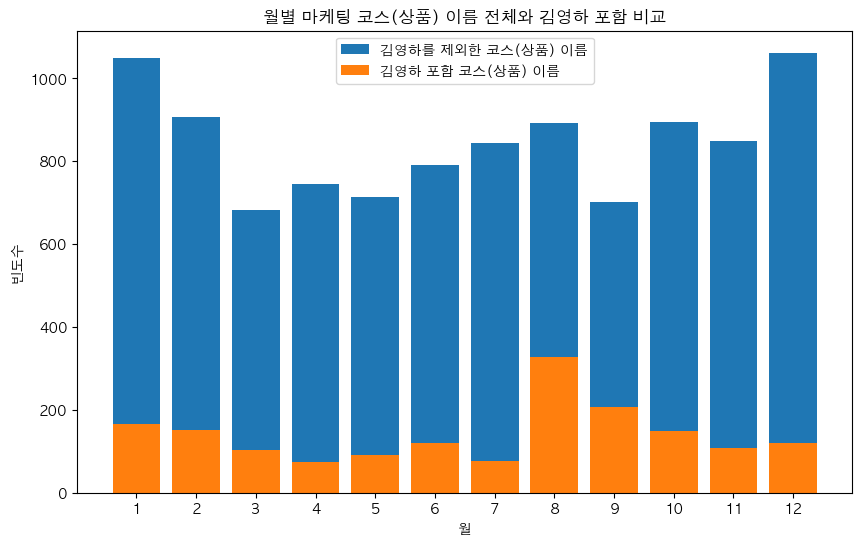

In [24]:
import matplotlib.pyplot as plt

# '마케팅' 카테고리에서 월별로 '코스(상품) 이름' 카운트
month_counts = []
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # '코스(상품) 이름' 카운트
    count = df_month.shape[0]
    month_counts.append(count)

# '김영하'가 포함된 '코스(상품) 이름' 카운트
kim_counts = []
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # '김영하'가 포함된 '코스(상품) 이름' 카운트
    kim_count = df_month[df_month['코스(상품) 이름'].str.contains('김영하')].shape[0]
    kim_counts.append(kim_count)

# 김영하를 제외한 마케팅 코스(상품) 이름의 빈도수
other_counts = [month_count - kim_count for month_count, kim_count in zip(month_counts, kim_counts)]

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), other_counts, label='김영하를 제외한 코스(상품) 이름')
plt.bar(range(1, 13), kim_counts, label='김영하 포함 코스(상품) 이름')
plt.xticks(range(1, 13))
plt.xlabel('월')
plt.ylabel('빈도수')
plt.title('월별 마케팅 코스(상품) 이름 전체와 김영하 포함 비교')
plt.legend()
plt.show()
#1월 1135

#### 좀더 직관적으로 봐보자!
- 위 그래프를 월마다 런칭된 강의 갯수를 껶은선으로 표현 하였습니다

In [25]:
# '마케팅' 카테고리에서 월별로 코스(상품) 이름의 유니크값의 갯수 출력
for month in range(1, 13):
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # 코스(상품) 이름의 유니크값의 갯수 출력
    unique_count = df_month['코스(상품) 이름'].nunique()
    print(f"{month}월: {unique_count}")


1월: 19
2월: 21
3월: 19
4월: 21
5월: 21
6월: 19
7월: 18
8월: 21
9월: 22
10월: 24
11월: 26
12월: 27


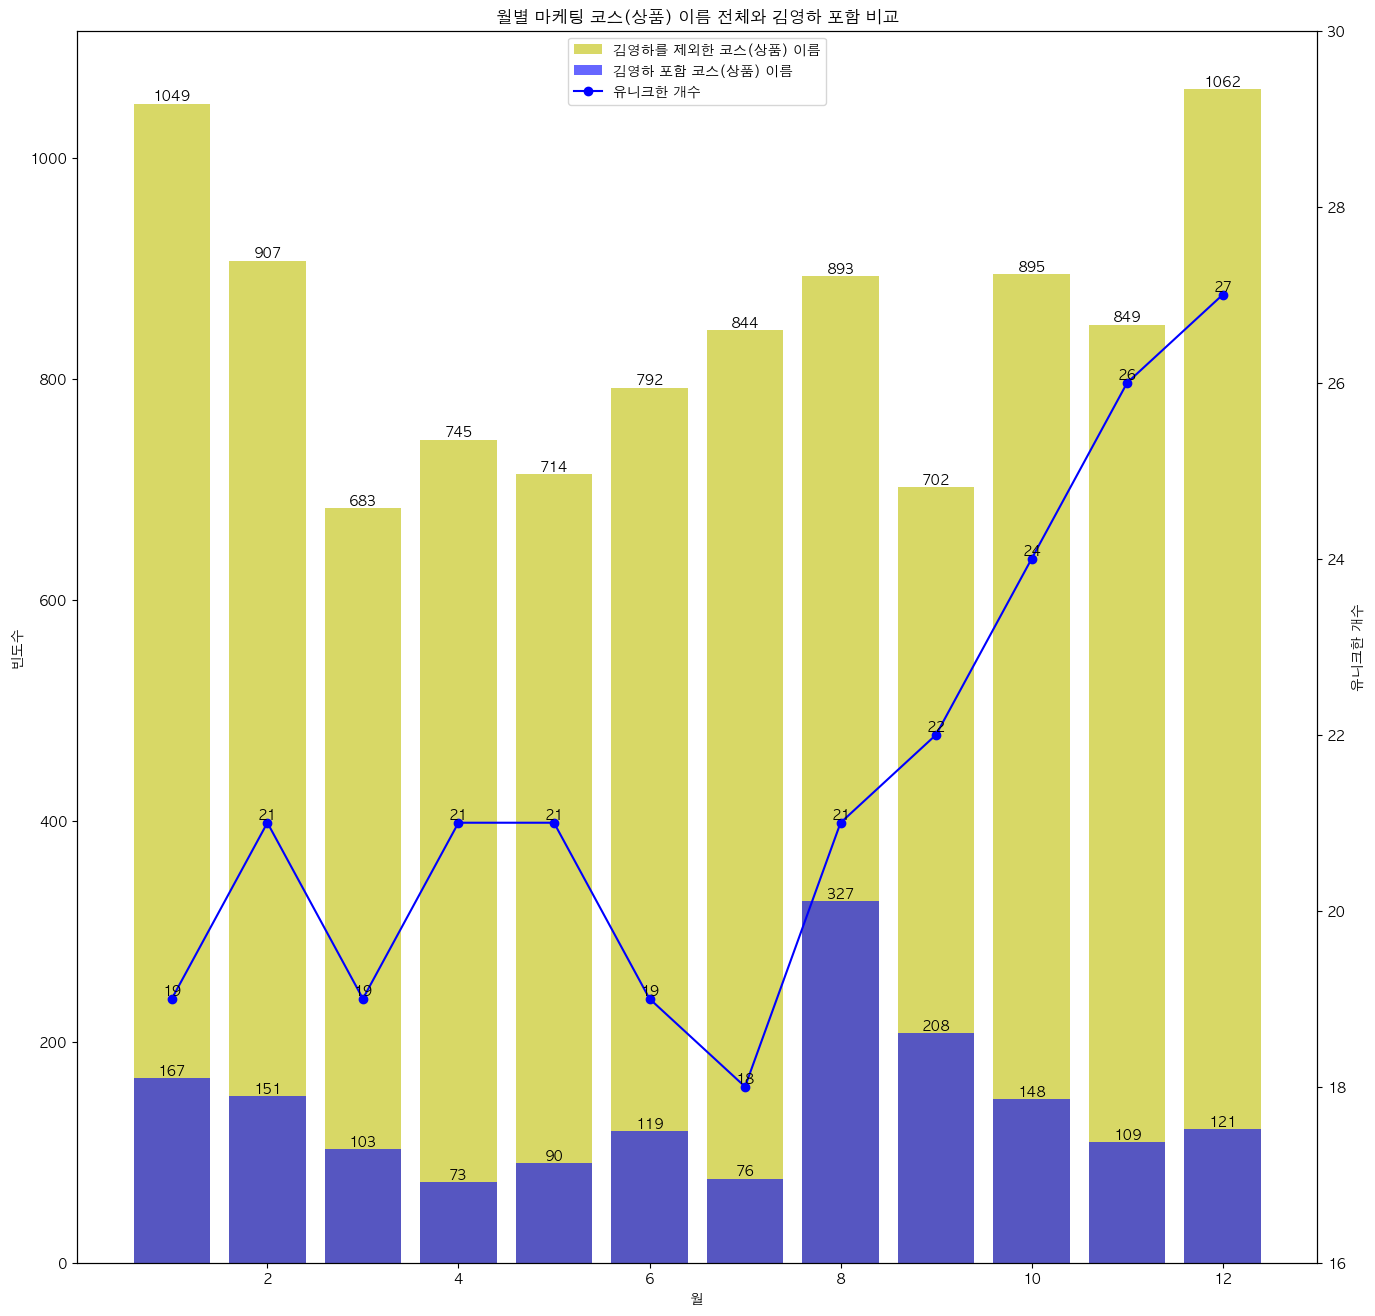

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 설정
months = np.arange(1, 13)
unique_counts = []

fig, ax1 = plt.subplots(figsize=(16, 16))


for month in months:
    # 해당 월에 해당하는 데이터 선택
    df_month = df_ca[df_ca['월'] == month]
    
    # 코스(상품) 이름의 유니크값의 갯수 출력
    unique_count = df_month['코스(상품) 이름'].nunique()
    unique_counts.append(unique_count)


# 김영하가 포함된 코스와 김영하를 제외한 코스의 판매 빈도를 막대 그래프로 표시
ax1.bar(months, other_counts, color='y', label='김영하를 제외한 코스(상품) 이름', alpha=0.6)
ax1.bar(months, kim_counts, color='b', label='김영하 포함 코스(상품) 이름', alpha=0.6)

# 카운트 값 텍스트로 표시
for i, count in enumerate(other_counts):
    ax1.text(months[i], count, str(count), ha='center', va='bottom')
for i, count in enumerate(kim_counts):
    ax1.text(months[i], count, str(count), ha='center', va='bottom')

# 각 월별 유니크한 코스(상품) 이름 개수를 꺾은선 그래프로 표시
ax2 = ax1.twinx()
ax2.plot(months, unique_counts, color='b', marker='o', label='유니크한 개수')

# 꺾은선 그래프의 값 텍스트로 표시
for i, count in enumerate(unique_counts):
    ax2.text(months[i], count, str(count), ha='center', va='bottom')

# 축과 레이블 설정
ax1.set_xlabel('월')
ax1.set_ylabel('빈도수')
ax2.set_ylabel('유니크한 개수')
ax1.set_title('월별 마케팅 코스(상품) 이름 전체와 김영하 포함 비교')

# 범례 표시
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=0)
ax2.set_ylim(16, 30)  # 오른쪽 y축 범위 설정

plt.show()


### 더레드에서의 김영하의 영향력은 어떨까?
- 아래그래프는 각 월마다 THERED의 카테고리별 판매 비율을 나타낸 원형그래프입니다
- 아래그래프를 보시면 김영하강의 영향으로 데이터 사이언스의 판매비율을 이기는 모습 심지어 프로그래밍을 능가하는 월 성적도 보여줍니다 
- 8월이후에는 김영하강의가 2개르 늘어난 시점부터는 더레드안에서의 마케팅 카테고리의 증가율을 눈에뛰게 표현되고 있습니다

In [27]:
thered= df[df["포맷"]=="RED"]
thered.to_csv("더레드조회용.csv")


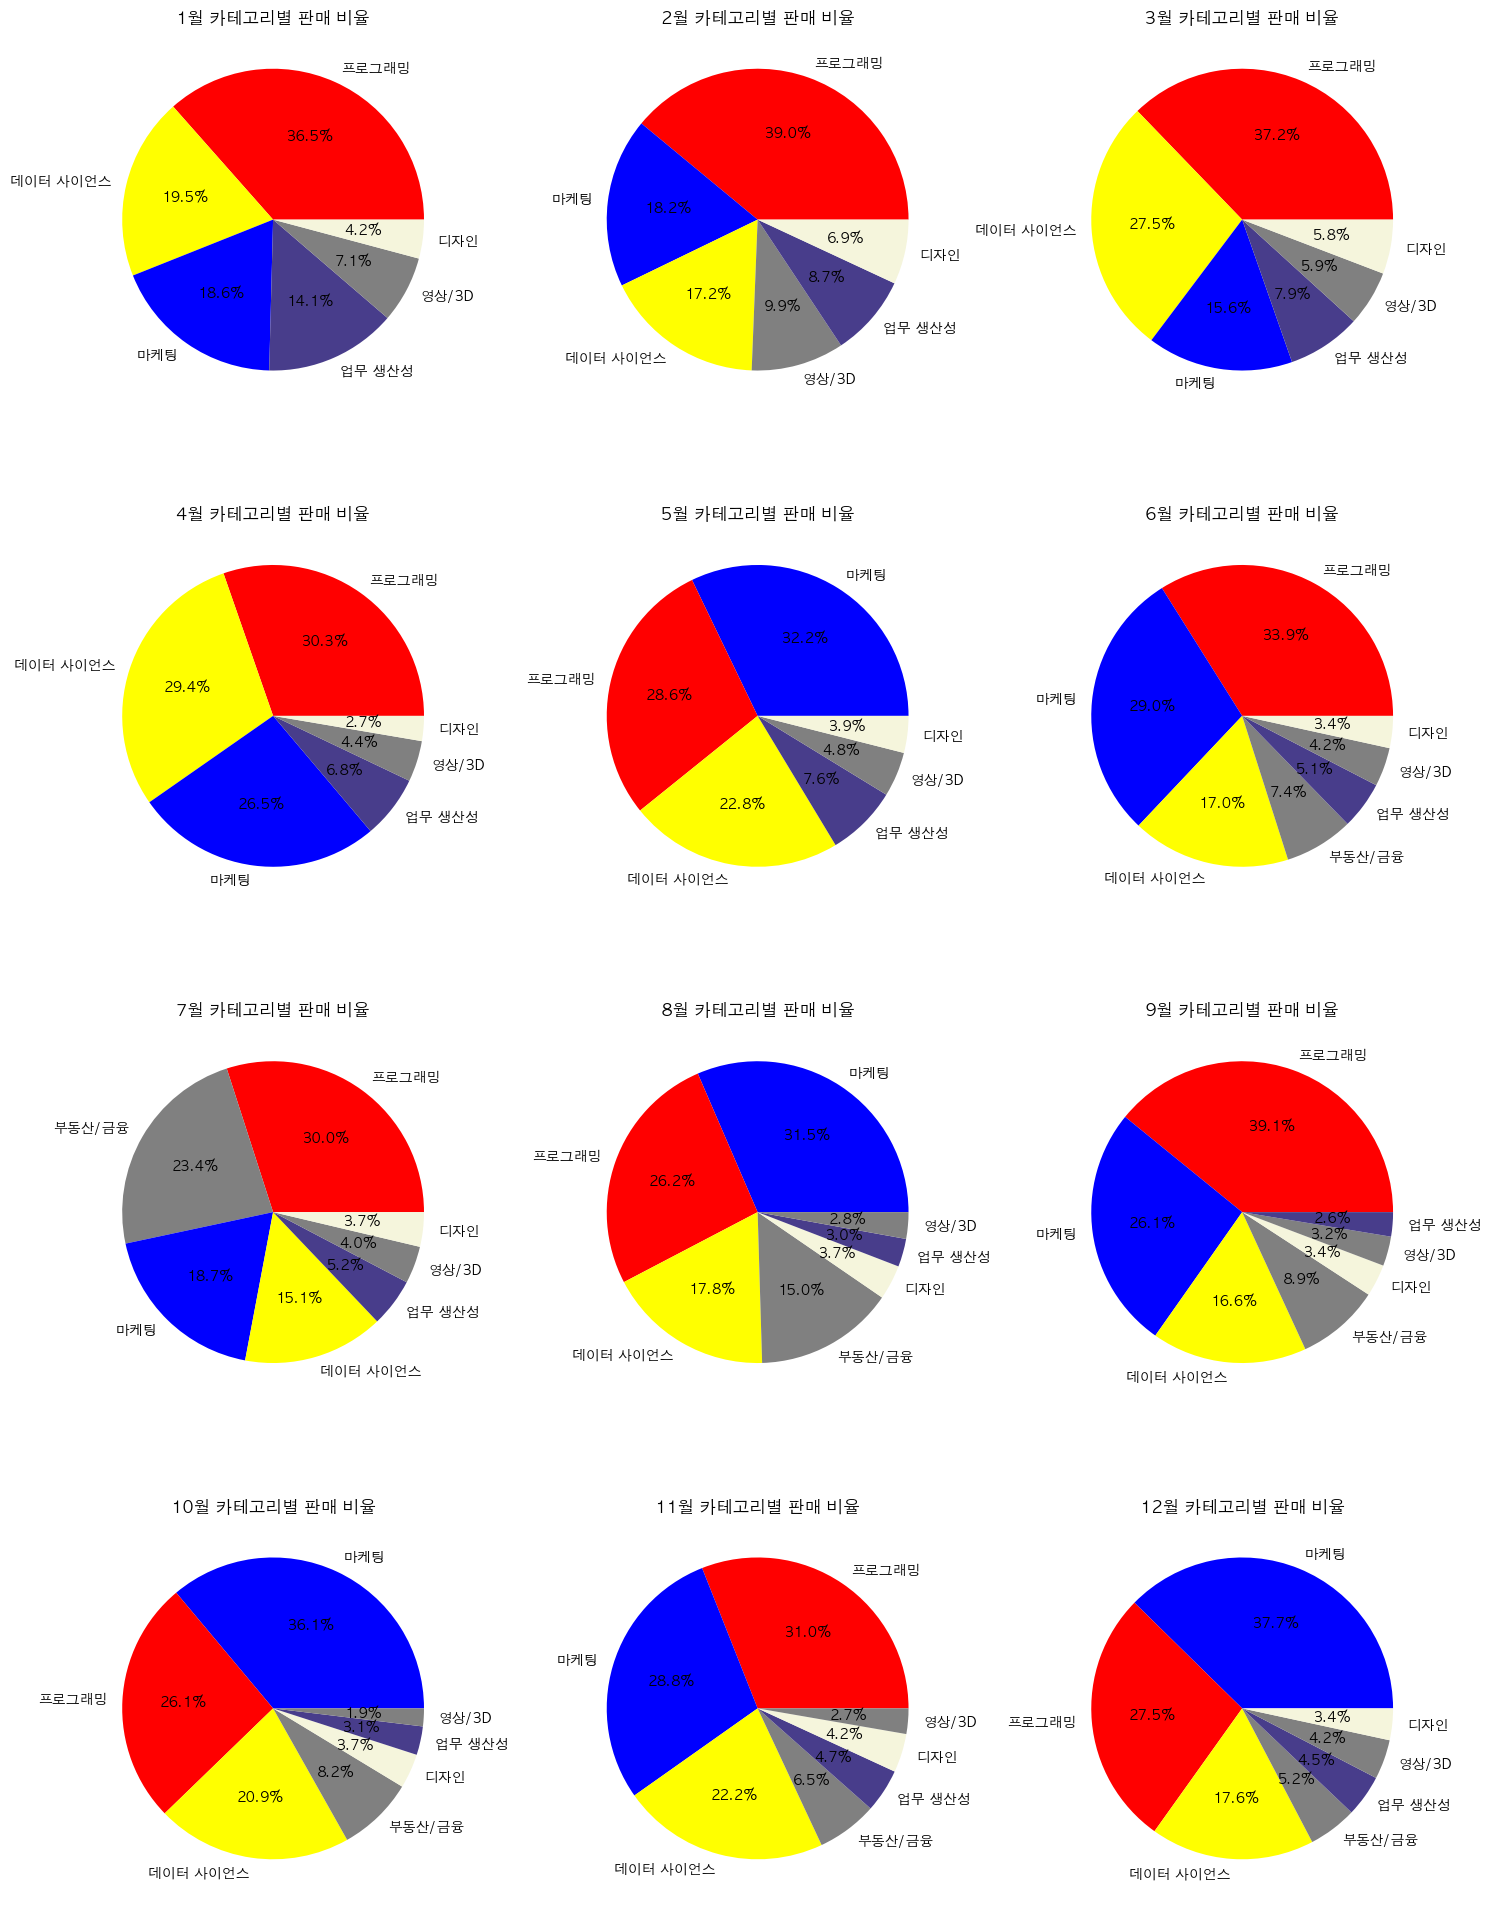

In [28]:
# import matplotlib.pyplot as plt

category_colors = {
    '마케팅': 'blue',
    '프로그래밍':'red',
    "데이터 사이언스":'yellow',
    "업무 생산성":'darkslateblue',
    "디자인":'beige',
    "영상3D":'magenta'
    # '마케팅': 'm',  # '마케팅' 카테고리가 두 번 지정되어 
}
fig, axs = plt.subplots(4, 3, figsize=(15, 20)) # 4x3 subplot 생성, 전체 크기는 15x20으로 설정

for month in range(1, 13):  # 1월부터 12월까지 반복
    # 해당 월의 데이터만 선택
    thered_month = thered[thered['월'] == month]
    
    # 카테고리별 빈도 계산 및 전체 행 수로 나누어 비율 계산
    category_ratio = thered_month['카테고리'].value_counts() / len(thered_month)
    
    # 결과를 DataFrame으로 변환
    category_ratio_df = category_ratio.reset_index()
    
    # 열 이름 변경
    category_ratio_df.columns = ['카테고리', '비율']
    
    # subplot의 위치 계산 (0부터 시작하는 인덱스를 사용)
    row = (month - 1) // 3
    col = (month - 1) % 3
    
  #카테고리에 대응하는 색상 리스트 생성 
    colors = [category_colors.get(category, 'gray') for category in category_ratio_df['카테고리']]
    # 해당 위치의 subplot에 원형 그래프 그리기
    axs[row, col].pie(category_ratio_df['비율'], labels=category_ratio_df['카테고리'], colors=colors, autopct='%1.1f%%')
    axs[row, col].set_title(f'{month}월 카테고리별 판매 비율')
    
plt.tight_layout()  # subplot 간의 간격 자동 조정
plt.show()


#### 더레드 카테고리 비율
- 아래는 더레드 카테고리안의 강의 비율을 표기한 원형 그래프입니다
- 위 그래프랑 비교해서보시면 카테고리에서 8.8%의 비율밖에 차지하지 않는 1월달이 전체 판매비율의 18.6%를 차지한다는 것을 볼수있습니다
- 10월달을 보시면 9.5%의 강의 비율로 36.1%의 전체판매량의 비율을 보여줍니다



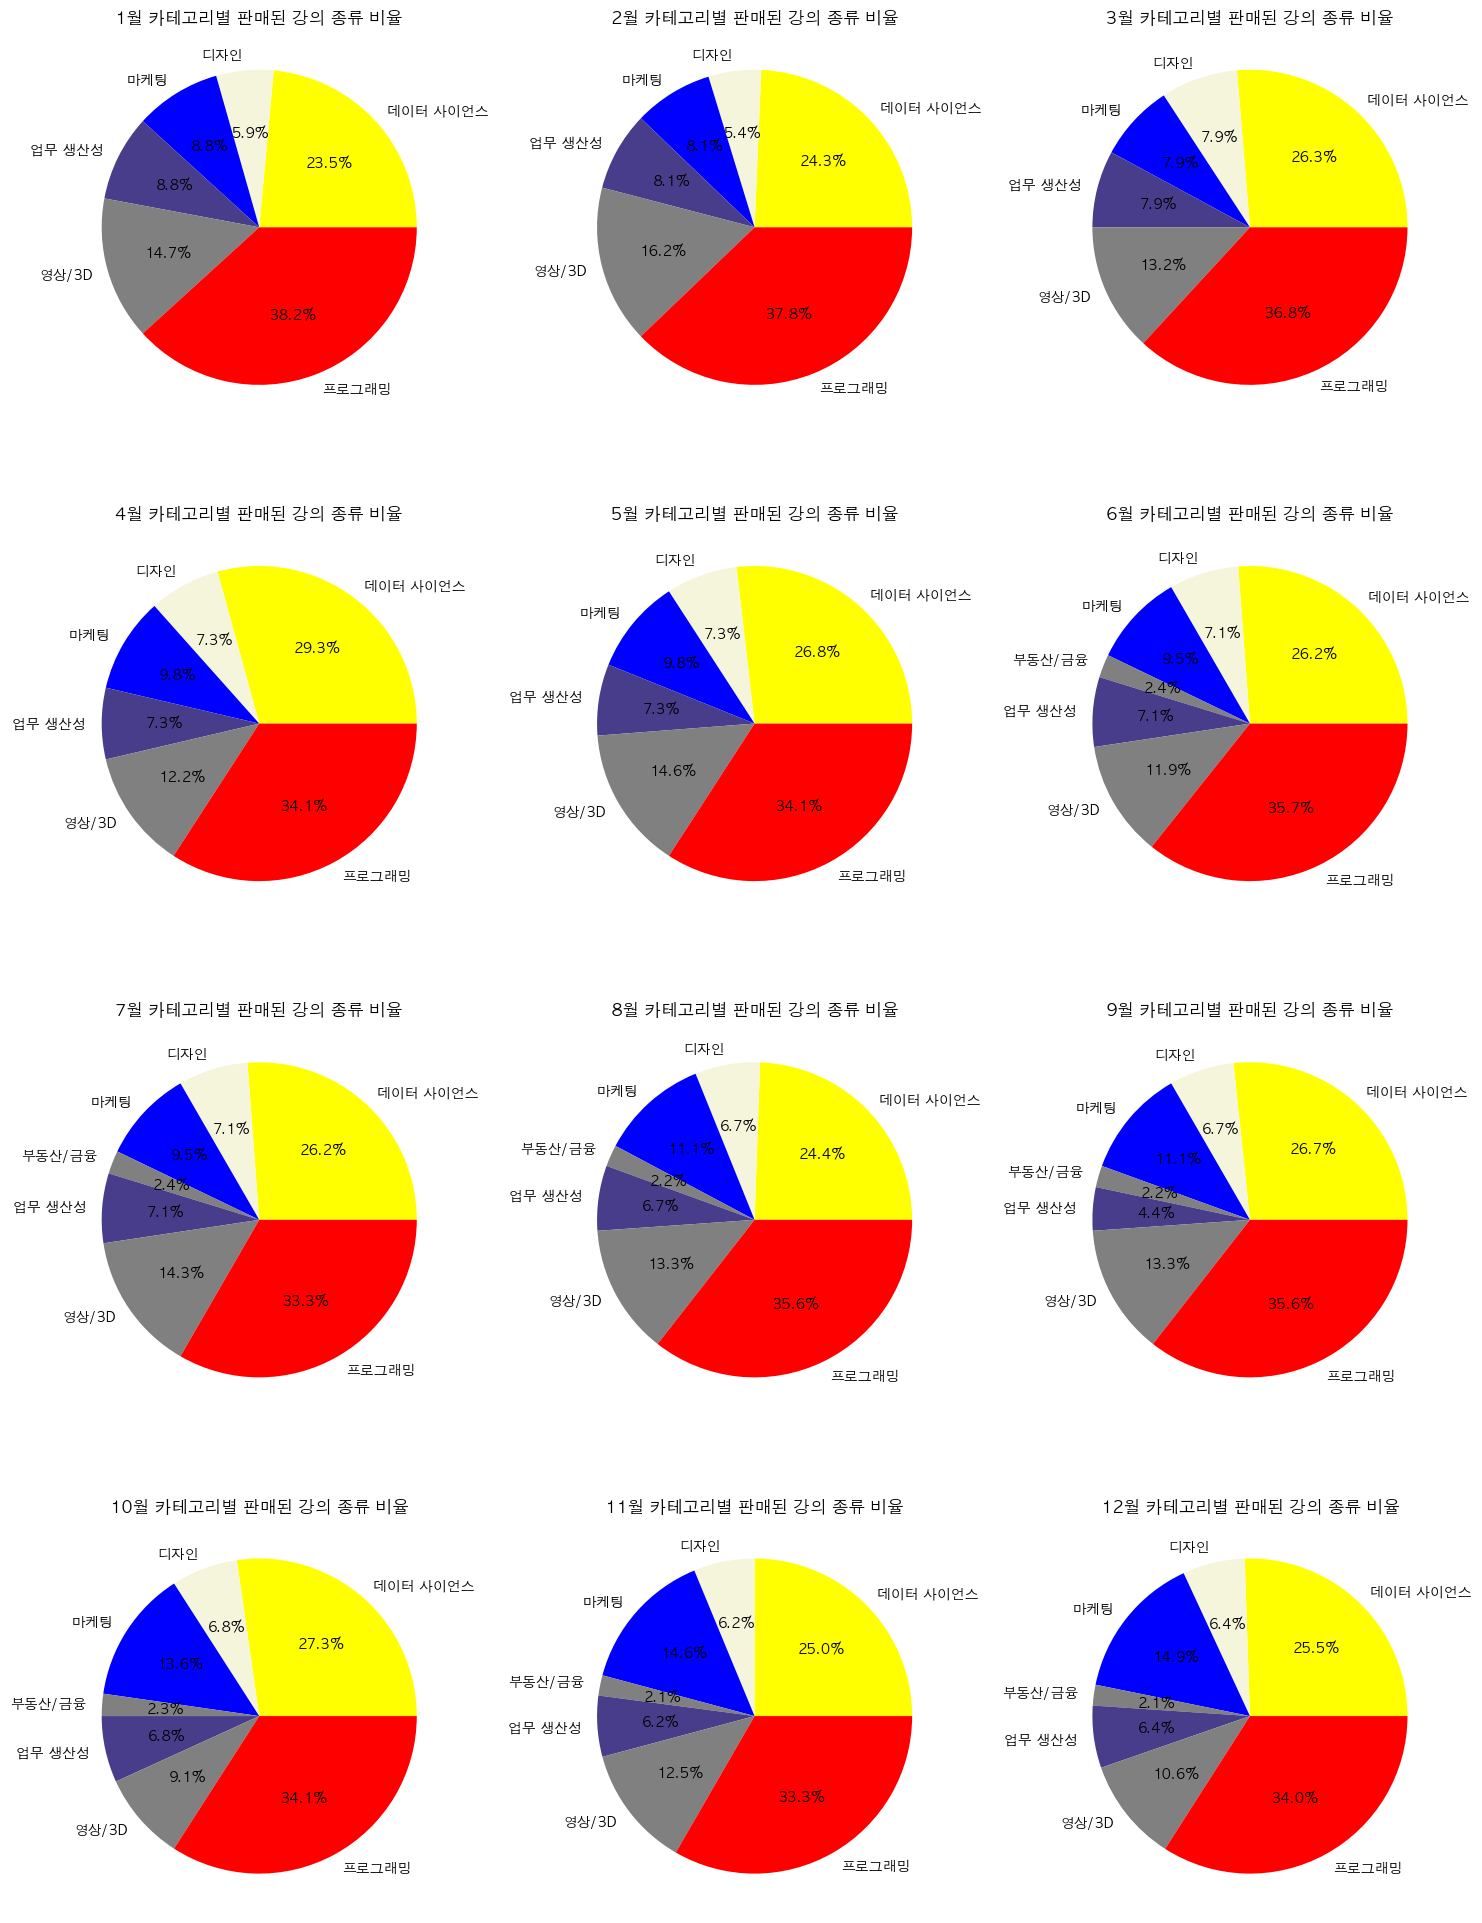

In [29]:
import matplotlib.pyplot as plt

category_colors = {
    '마케팅': 'blue',
    '프로그래밍':'red',
    "데이터 사이언스":'yellow',
    "업무 생산성":'darkslateblue',
    "디자인":'beige',
    "영상3D":'magenta'
}

fig, axs = plt.subplots(4, 3, figsize=(15, 20)) # 4x3 subplot 생성, 전체 크기는 15x20으로 설정

for month in range(1, 13):  # 1월부터 12월까지 반복
    # 해당 월의 데이터만 선택
    thered_month = thered[thered['월'] == month]
    
    # 카테고리별로 그룹화하고, 각 그룹에서 코스(상품) 이름의 고유한 값 개수를 계산
    category_courses_counts = thered_month.groupby('카테고리')['코스(상품) 이름'].nunique()
    
    # 카테고리별 판매된 강의 종류 비율 계산
    category_ratio = category_courses_counts / category_courses_counts.sum()
    
    # 결과를 DataFrame으로 변환
    category_ratio_df = category_ratio.reset_index()
    category_ratio_df.columns = ['카테고리', '비율']
    
    # subplot의 위치 계산 (0부터 시작하는 인덱스를 사용)
    row = (month - 1) // 3
    col = (month - 1) % 3
    
    # 해당 카테고리의 색상을 가져오거나, 지정된 색상이 없으면 기본 색상('grey')을 사용
    category_colors_in_month = [category_colors.get(category, 'grey') for category in category_ratio_df['카테고리']]
    
    # 해당 위치의 subplot에 원형 그래프 그리기
    axs[row, col].pie(category_ratio_df['비율'], labels=category_ratio_df['카테고리'], autopct='%1.1f%%', colors=category_colors_in_month)
    axs[row, col].set_title(f'{month}월 카테고리별 판매된 강의 종류 비율')
    
plt.tight_layout()  # subplot 간의 간격 자동 조정
plt.show()

### 김영하가 영향력이 크다 
#### 서브 메인 카테고리의 상관없이 강의의 품질이 좋으면 흥행시킬수있다
- 아래는 더레드에서 김영하라는 이름이 들어간 강의가 전체의 15퍼센트를 차지한것을 보여주고있습니다

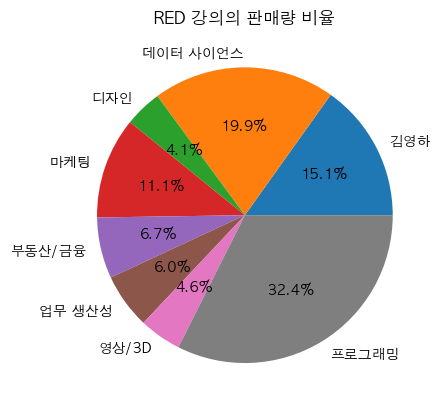

In [30]:
new_df.loc[new_df['코스(상품) 이름'].str.contains('김영하'),'카테고리'] = '김영하'
red_df = new_df[new_df['포맷'] == 'RED']
sell_counts = red_df.groupby('카테고리')['판매건수'].sum()
plt.pie(sell_counts, labels=sell_counts.index, autopct='%1.1f%%')
plt.title('RED 강의의 판매량 비율')
plt.show()

# 올인원 강의와 레드 강의의 평균 쿠폰 사용률에는 차이가 있습니다.
- 쿠폰 사용률의 정의
1. 실습데이터의 '쿠폰이름' 값이 '-'가 아닌 것을 쿠폰을 사용한 것으로 정의했습니다.
2. 강의별로 쿠폰을 사용한 행의 개수를 '쿠폰사용개수'로 정의하고, 전체 판매건수 대비 쿠폰사용개수의 비율을 '쿠폰사용률'로 정의했습니다.

## 왜 차이가 있는 것일까요?
- 우리의 가설: 성인 교육 시장에서 사람들은 필요한 강의를 듣는데, 쿠폰이 없어도 들을만큼 강의가 마음에 들었다? 아닐수도있음. 검증 불가!

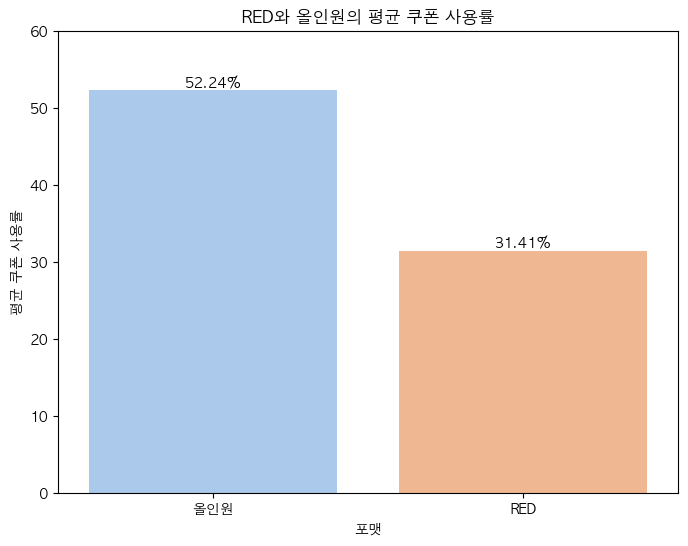

In [31]:
## red와 올인원 간 쿠폰 사용률 보기

#red와 올인원의 쿠폰사용률의 평균을 새로운 변수에 저장
not_red_mean = new_df[new_df['포맷'] != 'RED']['쿠폰사용률'].mean()
red_mean = new_df[new_df['포맷'] == 'RED']['쿠폰사용률'].mean()

plt.figure(figsize=(8, 6))
sns.set_palette("pastel")

ax = sns.barplot(x=['올인원', 'RED'], y=[not_red_mean, red_mean])

# 예쁘게 바꾸기
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')
# 라벨링
plt.xlabel('포맷')
plt.ylabel('평균 쿠폰 사용률')
plt.title('RED와 올인원의 평균 쿠폰 사용률')
plt.ylim(0, 60)

plt.show()

# 판매량이 많은 순으로 정렬해서 탑 10을 봤을 때, 카테고리가 프로그래밍이 아닌 강의가 1위입니다.
- 이유가 무엇일까요? 가격이 상대적으로 저렴해서 그런걸까요?
- 가격의 정의: 판매가격 중 가장 높은 값을 정가로 정의했습니다.

In [32]:
new_df.loc[:9,['코스(상품) 이름','카테고리', '판매건수','가격']]

,코스(상품) 이름,카테고리,판매건수,가격
0,초격차 패키지 : 일잘러 필수 스킬 모음.zip,업무 생산성,2691,168000
1,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),프로그래밍,2500,203000
2,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,2465,317100
3,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,2097,325500
4,올인원 패키지 : 세계 3등에게 배우는 실무 밀착 데이터 시각화,데이터 사이언스,1819,190000
5,초격차 패키지 : 한 번에 끝내는 서비스 기획의 모든 것,프로그래밍,1677,185000
6,올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,프로그래밍,1626,360500
7,초격차 패키지: Kubernetes와 Docker로 한 번에 끝내는 컨테이너 기반 MSA,프로그래밍,1613,402270
8,초격차 패키지 : 한 번에 끝내는 AWS 인프라 구축과 DevOps 운영,프로그래밍,1576,318500
9,초격차 패키지 : 한 번에 끝내는 컴퓨터 공학 전공필수 & 인공지능 심화,프로그래밍,1471,234000


/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/opt/homebrew/Caskroom/miniconda/base/envs/yeardream/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


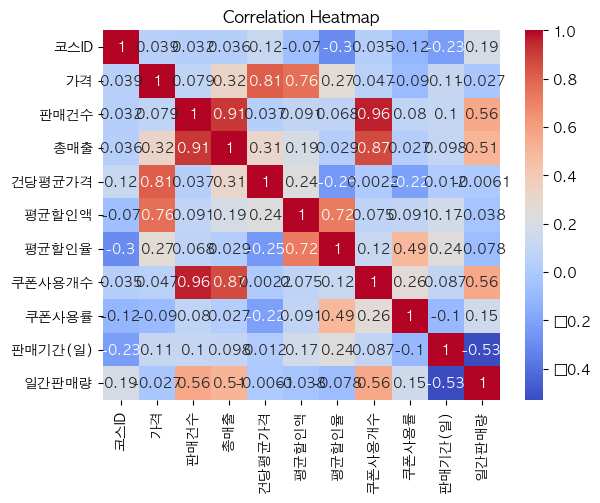

In [33]:
correlation = new_df.corr(numeric_only= True)

# heatmap 그리기
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 상관분석 결과, 가격과 판매건수 사이에는 상관관계가 없습니다.
- 그렇다면 가격과는 무관하게 구매에 영향을 주는 다른 요인이 있습니다.
- 쿠폰사용개수의 경우, 판매량이 많으면 당연히 쿠폰사용개수가 많을 수 밖에 없기 때문에 당연하게 상관계수가 높게 나옵니다.
- 우리 팀의 가설: 어쨌든 직무연관성이 높으면 (필요하면) 구매한다 >> 서브컨텐츠도 돈이된다. 양질의 강의를 런칭하는게 중요하다?

## 클래스 101과 패스트캠퍼스 서브콘텐츠의 차별화는 '전문성'이다.
### 이에 대한 검증을 위해, 일례로 클래스 101 글쓰기 강의들의 평균 강의 시간을 측정해보았습니다.
- Selenium을 활용하여 강의 정보를 크롤링함
- 강의시간 정보를 DataFrame으로 구성 후 강의시간 평균을 구함

In [34]:
# library import
from selenium import webdriver
from selenium.webdriver.common.by import By

import time
import pandas as pd
from datetime import datetime, timedelta

In [35]:
browser = webdriver.Chrome()
url = 'https://class101.net/ko/categories/6220895c9dede0214b0783d2'
browser.get(url)

In [36]:
# browser.find_element(By.CLASS_NAME, 'thesis__link').get_attribute('href')
links = browser.find_elements(By.CSS_SELECTOR, 'div.css-1qc8ju8 > a')
link_list = []
for i in links :
    link_list.append(i.get_attribute('href'))
time_list = []
title_list = []
# creator_list = []


for link in link_list:
    browser.get(link)
    title_list.append(browser.find_element(By.CLASS_NAME, 'css-mrlb5m').text)
    # creator = browser.find_element(By.CSS_SELECTOR, 'div.css-1qti8at > div:nth-child(1) > p').text
    # creator_list.append(creator)
    times = browser.find_elements(By.CLASS_NAME, 'css-1sik27s')
    
    # 반복문 이전에 time_sum을 초기화
    time_sum = timedelta()

    for ti in times:
        time_text = ti.text  # 시간 문자열을 가져옴
        time_obj = datetime.strptime(time_text, '%M:%S')  # 문자열을 시간 객체로 변환

        # 시간 단위(Hour)가 증가하는 조건 추가
        if time_obj.minute >= 60:
            hours = time_obj.minute // 60  # 시간 단위 계산
            time_obj -= timedelta(hours=hours)  # 시간 단위를 분에서 제거
            time_sum += timedelta(hours=hours)  # 시간 단위를 time_sum에 추가

        time_sum += timedelta(minutes=time_obj.minute, seconds=time_obj.second)  # 시간 객체를 timedelta 객체로 변환하여 더함

    # time_sum을 반복문 외부에서 time_list에 추가
    time_list.append(time_sum)

    time.sleep(2)

result_dict = {'title': title_list, 'link': link_list, 'time': time_list}

In [37]:
df = pd.DataFrame(result_dict)
df
df.to_csv('./class101.csv', encoding='utf-8-sig', index=False)

In [38]:
class_df = pd.read_csv('./class101.csv')
class_df

,title,link,time
0,"팔릴 수 밖에 없는 글쓰기, 내 가치를 열 배 이상으로 불리는 방법",https://class101.net/ko/products/5fe976c97bc0a...,0 days 04:29:35
1,성우 이용신의 인생을 바꿀 [목소리 연기]의 모든 것,https://class101.net/ko/products/606180a0cb18e...,0 days 06:25:36
2,수수진과 함께 애플 기본프로그램으로 도전하는 독립출판,https://class101.net/ko/products/5c5d780774eab...,0 days 03:15:05
3,20년차 방송작가의 '글 쓰는 게 만만해지는 하루 10분 메모 글쓰기',https://class101.net/ko/products/5e33f3b401d4c...,0 days 03:40:44
4,8년차 에디터에게 배우는 '잘 팔리는' 콘텐츠 제작법,https://class101.net/ko/products/5d90a088585f8...,0 days 03:04:01
5,"요즘 작가가 알려 주는 요즘 대본, 공모전 시나리오 완성하기",https://class101.net/ko/products/5f956711188cf...,0 days 05:21:11
6,"🧠 대중의 뇌를 사로잡는 스토리창작의 비밀(웹툰,웹소설,TV드라마,영화,게임시나리오)",https://class101.net/ko/products/606e2ce995f58...,1 days 01:52:56
7,하루 10분 보이스 코칭! 전직 기상캐스터의 목소리 교정 클래스,https://class101.net/ko/products/5ee38a573ed57...,0 days 09:12:12
8,"<금혼령, 조선혼인금지령> 작가에게 배우는 절대 막히지 않는 웹소설 & 플롯 설계",https://class101.net/ko/products/614274f788b34...,0 days 07:02:31
9,꾸준한 글쓰기를 도와드립니다 : 지속하는 글쓰기가 책 출간까지,https://class101.net/ko/products/5d2dbda9125d2...,0 days 02:27:21


In [39]:
from datetime import datetime, timedelta

total_time = timedelta()
time_list = class_df['time'].tolist()
if time_list:
    for td in time_list:
        days, trash, time_str = td.split(' ')
        hours, minutes, seconds = map(int, time_str.split(':'))
        total_time += timedelta(days=int(days), hours=hours, minutes=minutes, seconds=seconds)
        print(days, trash, time_str)

    # 평균 계산
    mean_time = total_time / len(time_list)
    print(mean_time)
else:
    print('데이터가 없습니다.')

0 days 04:29:35
0 days 06:25:36
0 days 03:15:05
0 days 03:40:44
0 days 03:04:01
0 days 05:21:11
1 days 01:52:56
0 days 09:12:12
0 days 07:02:31
0 days 02:27:21
0 days 05:17:08
0 days 03:46:41
0 days 03:27:41
0 days 04:26:57
0 days 08:50:54
0 days 05:41:49
0 days 04:40:28
0 days 06:38:28
0 days 06:38:31
0 days 03:45:28
6:12:15.850000


### 평균 강의시간이 0일 6시간 12분 16초 정도로, 매우 짧은 강의들이 많음을 확인할 수 있음.